# Exploration of data for RNN implementation

In [67]:
import torch
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [122]:
train_set = pd.read_csv('Google_Stock_Price_Train.csv',sep=',')[['Open','High','Low']]
val_set = train_set[len(train_set)-200:len(train_set)]
train_set = train_set[0:len(train_set)-200]
test_set = pd.read_csv('Google_Stock_Price_Test.csv',sep=',')[['Open','High','Low']]




train_set_with_low = pd.read_csv('Google_Stock_Price_Train.csv',sep=',')


sc = MinMaxScaler(feature_range = (0, 1))
sc.fit(pd.concat([train_set,val_set,test_set]))


train_set_scaled = train_set.copy()
train_set_scaled[train_set_scaled.columns]=sc.transform(train_set)
val_set_scaled = val_set.copy()
val_set_scaled[val_set_scaled.columns]=sc.transform(val_set_scaled)
test_set_scaled = pd.concat([val_set[len(val_set)-30:len(val_set)],test_set])
test_set_scaled[test_set_scaled.columns]=sc.transform(test_set_scaled)




<AxesSubplot:>

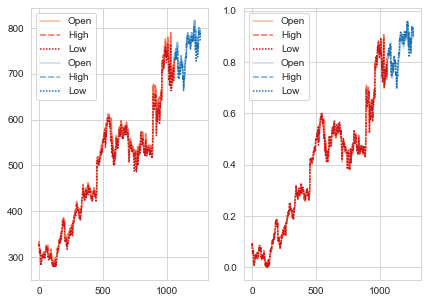

In [129]:

sns.set_style("whitegrid")
fig,ax=plt.subplots(1,2,figsize=(7,5))

sns.lineplot(data=train_set,ax=ax[0],palette='Reds')
sns.lineplot(data=val_set,ax=ax[0],palette='Blues')

sns.lineplot(data=train_set_scaled,ax=ax[1],palette='Reds')
sns.lineplot(data=val_set_scaled,ax=ax[1],palette='Blues')


## Building a 30-day overlapping training set

In [156]:
n_history = 30
X_train = torch.empty((len(train_set_scaled)-n_history,n_history,3))
y_train  = torch.empty(len(train_set_scaled)-n_history)

X_val = torch.empty((len(val_set_scaled)-n_history,n_history,3))
y_val  = torch.empty(len(val_set_scaled)-n_history)


X_test = torch.empty((len(test_set_scaled)-n_history,n_history,3))
y_test  = torch.empty(len(test_set_scaled)-n_history)

In [160]:
for k in range(0,len(train_set_scaled)-n_history):
        X_train[k] = torch.from_numpy(train_set_scaled[k:k+n_history].values)
        y_train[k] = train_set_scaled.iloc[k+n_history].Open

for k in range(0,len(val_set_scaled)-n_history):
        X_val[k] = torch.from_numpy(val_set_scaled[k:k+n_history].values)
        y_val[k] = val_set_scaled.iloc[k+n_history].Open
        
for k in range(0,len(test_set_scaled)-n_history):
        X_test[k] = torch.from_numpy(test_set_scaled[k:k+n_history].values)
        y_test[k] = test_set_scaled.iloc[k+n_history].Open